In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Shapes

(Shapes is an abbreviation to the more complete BAShapes dataset)

In [5]:
from metrics.load_expl import nc_load_graphs

In [20]:
dataset = "BAShapes"
model_architecture = "GCN"
expl = "cam"
MODE = "train"

gnn_num_layers = { #basd on the hyper-params of networks
    "GCN": 3,
    "GraphSAGE": 2,
    "GIN": 3,
    "Cheb": 2
}

graphs = nc_load_graphs(DATASET=dataset,
                 MODEL=model_architecture,
                 EXPL=expl,
                 MODE=MODE,
                 verbose=True,
                 lamb=0.001,
                 normalize=True)

1.000 ,0.000 ,1.000 ,1.000 


Note that each graph contains attribution scores for all nodes in the graph (for convenience). Typically, nodes outside the n-hop neighborhood will have 0 score

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

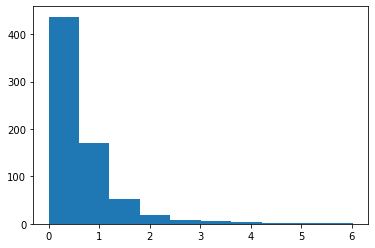

In [15]:
g = graphs[0][0]

print(nx.get_node_attributes(g,"node_imp").keys())
plt.hist((nx.get_node_attributes(g,"node_imp").values()));

### plausibility on GRID

In [16]:
from metrics.plausibility import get_shapes_plausibility

In [26]:
plausibility_per_class = get_shapes_plausibility(graphs, gnn_num_layers[model_architecture]) 
print(plausibility_per_class)

[nan, nan, 0.6844768517311876, 0.3106133060320009]


### Sufficiency

In [29]:
from metrics.NC_F1_fidelity import build_expl , compute_fidelity
from models.models_BAShapes import GCN_framework as framework
from torch_geometric.datasets import BAShapes

In [ ]:
gcn , graphs = build_expl(dataset,model_architecture,BAShapes,framework,expl=expl)
        
for c in range(len(graphs.keys())):
    if not graphs[c] == None:
        suf = compute_fidelity(gcn, graphs, y=c)
    else:
        suf = float("nan")

    print("Suff. class {} = {:.3f}".format(c, suf))

In [44]:
gcn,graphs = build_expl(DATASET,MODEL,dataset_fun,framework,expl=expl,MODE=MODE)

suf1, comp1 = compute_fidelity(gcn,graphs,y=1,color=False)
suf0, comp0 = compute_fidelity(gcn,graphs,y=0,color=False)

models/BA_2grid_GCN
Test Loss: 0.003, Train Acc: 0.994 Test Acc: 0.998


In [46]:
f1_1 = 2*(((1-suf1) * (comp1))/((1-suf1) + (comp1)))
f1_0 = 2*(((1-suf0) * (comp0))/((1-suf0) + (comp0)))

print("f1 class 0 :", f1_0)
print("f1 class 1 :", f1_1)

f1 class 0 : 0.34425428130625607
f1 class 1 : 0.7225875146072238
